In [101]:
#Packages
import numpy as np
import scipy
import matplotlib.pyplot as plt
from ns import ns
from scipy import stats
from scipy.stats import multivariate_normal as normal
from scipy.interpolate import interp1d
from scipy.integrate import quad
import csv
import matplotlib
from scipy.stats import gaussian_kde


#Constants
G = 6.674e-8 #Gravitational constant cgs
c = 2.998e10 #speed of light cm/s
Msun = 1.988e33 #in grams for reading out in terms of solar masses
rhonuc = 2.7e14 #nuclear density g/cm^3

Processed 0 lines.
Processed 1 lines.
Processed 2 lines.
Processed 3 lines.
Processed 4 lines.
Processed 5 lines.
Processed 6 lines.
Processed 7 lines.
Processed 8 lines.
Processed 9 lines.
Processed 10 lines.
Processed 11 lines.
Processed 12 lines.
Processed 13 lines.
Processed 14 lines.
Processed 15 lines.
Processed 16 lines.
Processed 17 lines.
Processed 18 lines.
Processed 19 lines.
Processed 20 lines.
Processed 21 lines.
Processed 22 lines.
Processed 23 lines.
Processed 24 lines.
Processed 25 lines.
Processed 26 lines.
Processed 27 lines.
Processed 28 lines.
Processed 29 lines.
Processed 30 lines.
Processed 31 lines.
Processed 32 lines.
Processed 33 lines.
Processed 34 lines.
Processed 35 lines.
Processed 36 lines.
Processed 37 lines.
Processed 38 lines.
Processed 39 lines.
Processed 40 lines.
Processed 41 lines.
Processed 42 lines.
Processed 43 lines.
Processed 44 lines.
Processed 45 lines.
Processed 46 lines.
Processed 47 lines.
Processed 48 lines.
Processed 49 lines.
Processed 

Processed 1592 lines.
Processed 1593 lines.
Processed 1594 lines.
Processed 1595 lines.
Processed 1596 lines.
Processed 1597 lines.
Processed 1598 lines.
Processed 1599 lines.
Processed 1600 lines.
Processed 1601 lines.
Processed 1602 lines.
Processed 1603 lines.
Processed 1604 lines.
Processed 1605 lines.
Processed 1606 lines.
Processed 1607 lines.
Processed 1608 lines.
Processed 1609 lines.
Processed 1610 lines.
Processed 1611 lines.
Processed 1612 lines.
Processed 1613 lines.
Processed 1614 lines.
Processed 1615 lines.
Processed 1616 lines.
Processed 1617 lines.
Processed 1618 lines.
Processed 1619 lines.
Processed 1620 lines.
Processed 1621 lines.
Processed 1622 lines.
Processed 1623 lines.
Processed 1624 lines.
Processed 1625 lines.
Processed 1626 lines.
Processed 1627 lines.
Processed 1628 lines.
Processed 1629 lines.
Processed 1630 lines.
Processed 1631 lines.
Processed 1632 lines.
Processed 1633 lines.
Processed 1634 lines.
Processed 1635 lines.
Processed 1636 lines.
Processed 

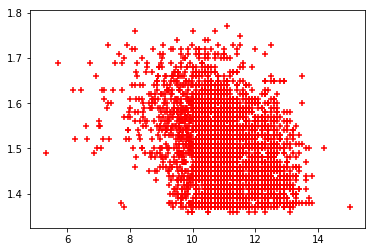

R =  [10.7, 8.19, 9.15, 9.95, 9.6, 10.7, 10.3, 11.3, 11.7, 10.6, 12.3, 10.4, 13.1, 10.4, 10.2, 12.1, 10.4, 11.8, 7.01, 10.6, 12.1, 10.4, 10.9, 10.5, 10.2, 10.5, 11.2, 10.9, 10.3, 10.9, 11.0, 12.8, 12.2, 10.1, 10.3, 10.2, 11.0, 11.0, 9.26, 9.35, 12.8, 12.3, 10.4, 12.1, 11.9, 11.3, 9.46, 12.8, 11.1, 10.9, 7.88, 13.6, 12.8, 11.2, 10.5, 12.1, 11.1, 8.33, 10.3, 10.2, 7.03, 12.6, 10.0, 9.97, 8.75, 9.63, 10.7, 10.7, 10.1, 11.2, 10.4, 12.4, 11.0, 11.4, 13.3, 12.3, 10.1, 11.0, 10.3, 9.32, 8.72, 11.0, 10.9, 7.65, 9.75, 10.5, 12.1, 10.2, 13.0, 10.4, 11.2, 10.7, 11.5, 10.4, 9.57, 10.8, 10.4, 10.4, 12.3, 12.1, 10.2, 13.1, 12.6, 9.32, 11.8, 11.2, 11.8, 12.6, 10.7, 12.8, 10.7, 11.3, 11.5, 9.75, 10.6, 11.9, 8.43, 11.1, 11.8, 11.8, 11.8, 9.88, 11.0, 10.1, 10.5, 12.2, 10.5, 9.96, 11.1, 10.4, 9.25, 11.6, 11.4, 10.9, 10.4, 10.3, 12.5, 9.15, 9.87, 8.97, 10.2, 11.3, 8.6, 9.71, 10.9, 12.4, 10.3, 12.1, 9.76, 12.5, 12.6, 12.0, 12.7, 11.6, 11.0, 9.97, 11.1, 13.1, 8.96, 11.6, 10.9, 10.9, 13.3, 8.89, 9.24, 10.7, 

In [102]:
R = []
M = []

with open('EoS-insensitive_posterior_samples.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Processed {line_count} lines.')
            line_count = line_count + 1
        elif line_count == 2921:
            plt.scatter(R,M,marker='+',c='red')
            plt.show()
            print("R = ", R)
            print('\n')
            print("M = ", M)
            R = np.asarray(R)
            M = np.asarray(M)
            break
        else:
            R.append(float(row[4]))
            M.append(float(row[0]))
            print(f'Processed {line_count} lines.')
            line_count = line_count + 1

Processed 1 lines.
Processed 2 lines.
Processed 3 lines.
Processed 4 lines.
Processed 5 lines.
Processed 6 lines.
Processed 7 lines.
Processed 8 lines.
Processed 9 lines.
Processed 10 lines.
Processed 11 lines.
Processed 12 lines.
Processed 13 lines.
Processed 14 lines.
Processed 15 lines.
Processed 16 lines.
Processed 17 lines.
Processed 18 lines.
Processed 19 lines.
Processed 20 lines.
Processed 21 lines.
Processed 22 lines.
Processed 23 lines.
Processed 24 lines.
Processed 25 lines.
Processed 26 lines.
Processed 27 lines.
Processed 28 lines.
Processed 29 lines.
Processed 30 lines.
Processed 31 lines.
Processed 32 lines.
Processed 33 lines.
Processed 34 lines.
Processed 35 lines.
Processed 36 lines.
Processed 37 lines.
Processed 38 lines.
Processed 39 lines.
Processed 40 lines.
Processed 41 lines.
Processed 42 lines.
Processed 43 lines.
Processed 44 lines.
Processed 45 lines.
Processed 46 lines.
Processed 47 lines.
Processed 48 lines.
Processed 49 lines.
Processed 50 lines.
Processed

Processed 1618 lines.
Processed 1619 lines.
Processed 1620 lines.
Processed 1621 lines.
Processed 1622 lines.
Processed 1623 lines.
Processed 1624 lines.
Processed 1625 lines.
Processed 1626 lines.
Processed 1627 lines.
Processed 1628 lines.
Processed 1629 lines.
Processed 1630 lines.
Processed 1631 lines.
Processed 1632 lines.
Processed 1633 lines.
Processed 1634 lines.
Processed 1635 lines.
Processed 1636 lines.
Processed 1637 lines.
Processed 1638 lines.
Processed 1639 lines.
Processed 1640 lines.
Processed 1641 lines.
Processed 1642 lines.
Processed 1643 lines.
Processed 1644 lines.
Processed 1645 lines.
Processed 1646 lines.
Processed 1647 lines.
Processed 1648 lines.
Processed 1649 lines.
Processed 1650 lines.
Processed 1651 lines.
Processed 1652 lines.
Processed 1653 lines.
Processed 1654 lines.
Processed 1655 lines.
Processed 1656 lines.
Processed 1657 lines.
Processed 1658 lines.
Processed 1659 lines.
Processed 1660 lines.
Processed 1661 lines.
Processed 1662 lines.
Processed 

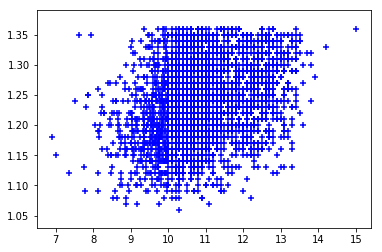

In [108]:
with open('EoS-insensitive_posterior_samples.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count = line_count + 1
        elif line_count == 2921:
            plt.scatter(r,m,marker='+',c='blue')
            plt.show()
            break
        else:
            r.append(float(row[5]))
            m.append(float(row[1]))
            print(f'Processed {line_count} lines.')
            line_count = line_count + 1

In [111]:
#star 1
xmin, xmax = min(R), max(R)
ymin, ymax = min(M), max(M)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([R, M])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

In [116]:
#star 2
x2min, x2max = min(r), max(r)
y2min, y2max = min(m), max(m)
X2, Y2 = np.mgrid[x2min:x2max:100j, y2min:y2max:100j]
positions = np.vstack([X2.ravel(), Y2.ravel()])
values = np.vstack([r, m])
kernel = stats.gaussian_kde(values)
Z2 = np.reshape(kernel(positions).T, X2.shape)

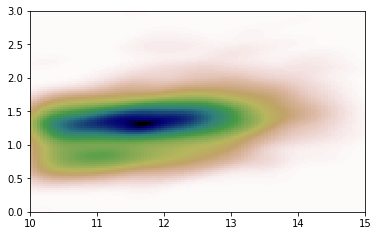

In [117]:
#fig, ax = plt.subplots()
plt.imshow(Z, cmap=plt.cm.gist_earth_r,extent=[10, 15, 0, 3])
#ax.plot(R, M, 'k.', markersize=2)
#ax.set_xlim([xmin, xmax])
#ax.set_ylim([ymin, ymax])
plt.ylim([0,3])
plt.show()

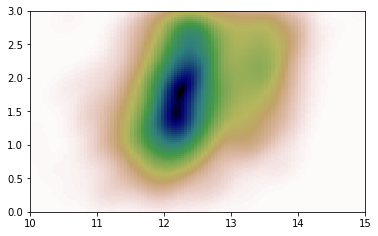

In [118]:
#fig, ax = plt.subplots()
plt.imshow(np.rot90(Z2), cmap=plt.cm.gist_earth_r,extent=[10, 15, 0, 3])
#ax.plot(m3, m4, 'k.', markersize=2)
#ax.set_xlim([x2min, x2max])
#ax.set_ylim([y2min, y2max])
plt.ylim([0,3])
plt.show()